# Nora's Notebook

## Introduction

##### For this project, we are required to find some metric that will determine the best neighborhood in Pittsburgh. Our approach to finding our metric was to orignially come up wit ideas and then find datasets that applied. Our first idea was "best neighborhood to have a glow-up" or "best neighborhood to raise a family" However, this proposed to be a challenge because the datasets are limited in what they cover. We struggled to find datasets that were applicable to these metrics. However, we did notice that there is a lot of data regarding traffic and roadways in Pittsburgh neighborhoods. For this reason, we knew we wanted to do something with this information, but also for our metric to be intersting. That is how we decided on our metric "best neighborhood to film Cars 4". 

## Metric

##### As mentioned above, our metric is "best neighborhood to film Cars 4". The features we are measuring based on this metric are number of speed bumps, number of traffic lights, and number of bridges per neighborhood. In our idea of Cars 4, there should be the least number of speed bumps and traffic lights, but more bridges. For these reasons, we are reviewing datasets that cover speed bumps, traffic lights, and city bridges.

## Dataset #1 Speed Bumps

In [10]:
import pandas as pd

In [11]:
#import humps dataset
humps = pd.read_csv("humps.csv")
counts = humps['neighborhood'].value_counts()
counts

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Upper Hill              4
Brookline               4
Homewood South          4
South Side Slopes       4
Perry North             4
Garfield                3
Squirrel Hill North     3
South Side Flats        3
Mount Washington        3
Bloomfield              3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

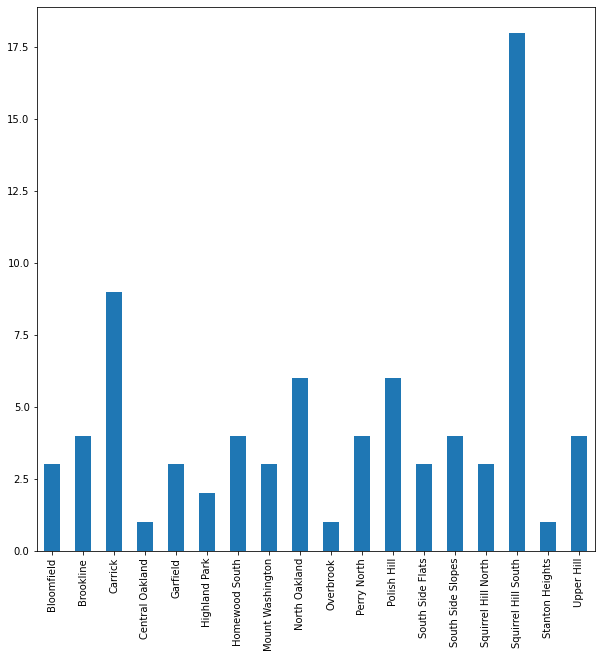

In [12]:
#Show humps count as bar graph
humps["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90, figsize=(10, 10))

In [13]:
#import neighborhood dataset to find square area
hood_one = pd.read_csv("hood.csv")

                     Humps Per Square Mile
Overbrook                         1.195461
Stanton Heights                   1.354667
Highland Park                     1.709606
Brookline                         1.914856
Squirrel Hill North               2.452165
Mount Washington                  2.648935
South Side Flats                  3.245641
Perry North                       3.306023
Central Oakland                   3.570835
Bloomfield                        4.273927
Carrick                           5.390739
South Side Slopes                 5.532043
Garfield                          6.559032
Squirrel Hill South               6.724936
Homewood South                   10.331962
North Oakland                    12.072386
Upper Hill                       12.771846
Polish Hill                      23.422473


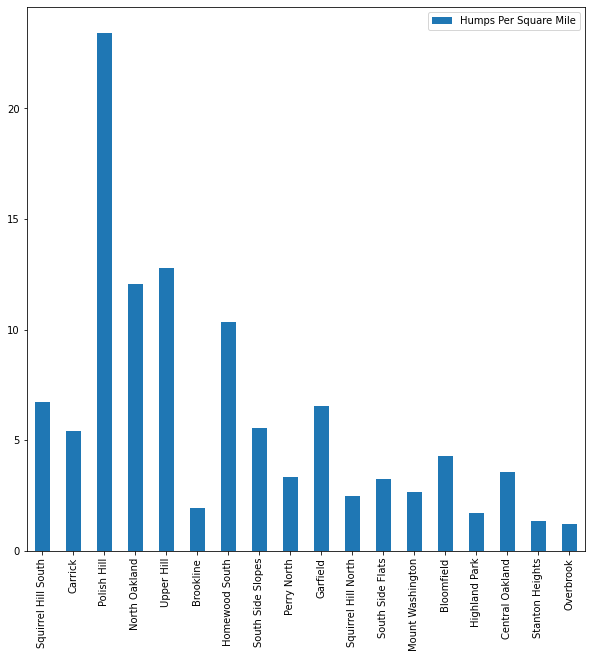

In [14]:
#create a dictionary of the total count of speed bumbs per neighborhood
neighborhoods = counts.to_dict()

#iterate through the dictionary to divide each count by the neighborhood's area
for index, row in hood_one.iterrows():
    area = row['sqmiles']
    hood = row['hood']
    if hood in neighborhoods:
        neighborhoods[hood] = neighborhoods[hood]/area
        
#turn dictionary back into a data frame
hood_area = pd.DataFrame(neighborhoods, index=[0])
hood_area = hood_area.transpose()
hood_area.columns=["Humps Per Square Mile"]

#print sorted dictionary
print(hood_area.sort_values(by="Humps Per Square Mile"))
#represent data frame as a bar plot
hood_area.plot(kind='bar', rot=90, figsize=(10, 10))

There is an easier way to do this by merging the data sets. Then I created a function that iterates through the rows of the data frame and divides each "# of speed bumps" by its corresponding neighborhood size. This can be seen below.

In [15]:
#merge the counts with area of neighborhood
humps = pd.read_csv("humps.csv")
humps_counts = humps['neighborhood'].value_counts().to_frame().reset_index()
humps_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of speed humps'}, inplace = True)
humps_counts

humps_counts = humps_counts.merge(hood_one, how='inner', left_on='neighborhood', right_on='hood')
humps_counts = humps_counts.loc[:, ['neighborhood','# of speed humps','sqmiles',]]

#combine columns
def calc_per_area(row):
    return (row['# of speed humps']/row['sqmiles'])

# Apply the custom function to create a new column 'Combined'
humps_counts['humps per area'] = humps_counts.apply(calc_per_area, axis=1)
humps_counts

#descending order
humps_counts = humps_counts.sort_values(by="humps per area", ascending=True)
humps_counts

,neighborhood,# of speed humps,sqmiles,humps per area
17,Overbrook,1,0.836497,1.195461
16,Stanton Heights,1,0.738189,1.354667
14,Highland Park,2,1.169860,1.709606
5,Brookline,4,2.088930,1.914856
10,Squirrel Hill North,3,1.223409,2.452165
12,Mount Washington,3,1.132531,2.648935
11,South Side Flats,3,0.924317,3.245641
8,Perry North,4,1.209913,3.306023
15,Central Oakland,1,0.280047,3.570835
13,Bloomfield,3,0.701931,4.273927


## Dataset #1 Conclusion
##### As you can see, after dividing each neighborhood's total number of speed bumbs by its square area, Overbrook reveals to be the least speed bump dense neighborhood. Thus, Overbrook is considered to be the best option to film Cars 4 based on a lack of speed bumps, allowing the charactes to speed.

## Dataset #2 Scenic Route (Bridges)

In [16]:
bridge = pd.read_csv("bridge.csv")
bridge_counts = bridge['neighborhood'].value_counts()
bridge_counts

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Slopes             5
South Side Flats              5
West End                      4
South Oakland                 4
Mount Washington              4
East Allegheny                4
Hazelwood                     4
Bon Air                       3
Larimer                       3
Allegheny Center              3
Sheraden                      3
Polish Hill                   3
Bloomfield                    2
Bluff                         2
Perry South                   2
Lincoln-Lemington-Belmar      2
Swisshelm Park                2
Windgap                       2
Highland Park                 2
Squirrel Hill North           2
Arlington                     2
Allegheny West                2
Greenfield                    2
Marshall-Shadeland            2
East Lib

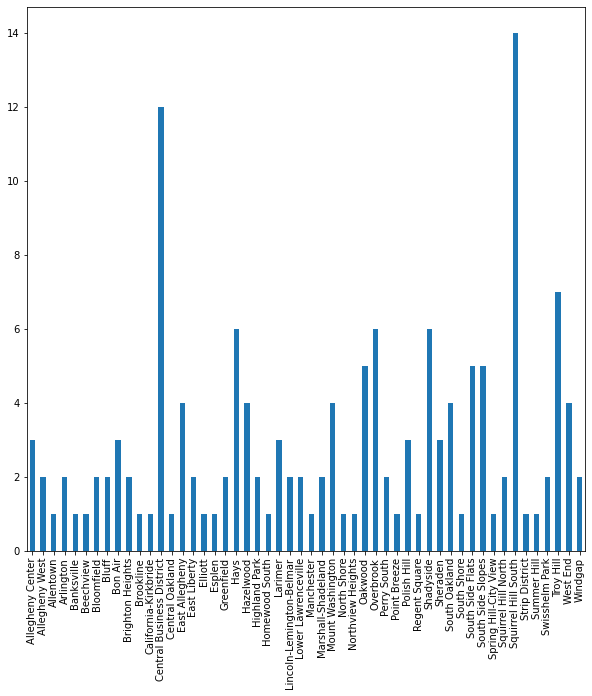

In [17]:
bridge["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90, figsize=(10, 10))

In [18]:
#import neighborhood dataset to find square area
hood_two = pd.read_csv("hood.csv")

                           Bridges Per Square Mile
West End                                 20.558597
Oakwood                                  19.811177
Central Business District                18.586440
East Allegheny                           17.027396
Troy Hill                                15.187209
Allegheny Center                         14.358407
Allegheny West                           13.812698
Polish Hill                              11.711237
Bon Air                                   9.528939
South Oakland                             8.265173
Overbrook                                 7.172767
South Side Slopes                         6.915054
Larimer                                   6.738788
Shadyside                                 6.520598
Bluff                                     6.148904
South Side Flats                          5.409401
Squirrel Hill South                       5.230506
Regent Square                             5.096352
Windgap                        

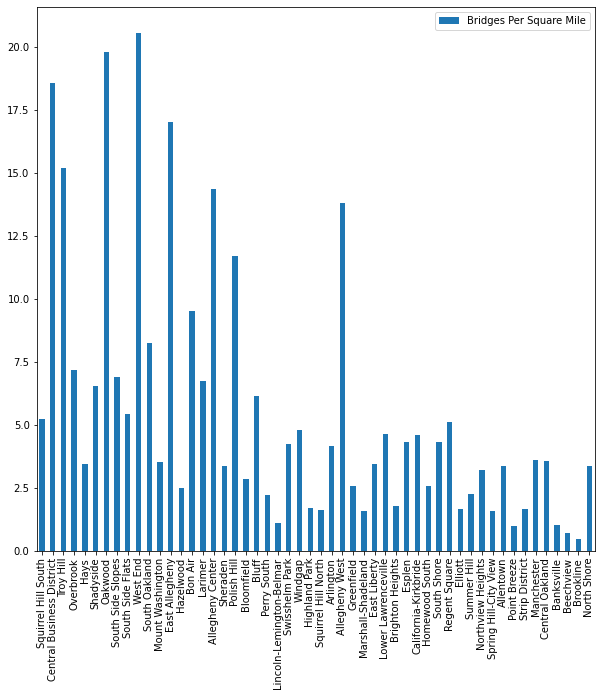

In [19]:
#create a dictionary of the total count of bridges per neighborhood
neighborhoods = bridge_counts.to_dict()

#iterate through the dictionary to divide each count by the neighborhood's area
for index, row in hood_two.iterrows():
    area = row['sqmiles']
    hood = row['hood']
    if hood in neighborhoods:
        neighborhoods[hood] = neighborhoods[hood]/area
        
#turn dictionary back into a data frame
bridge_area = pd.DataFrame(neighborhoods, index=[0])
bridge_area = bridge_area.transpose()
bridge_area.columns=["Bridges Per Square Mile"]

#print sorted dictionary
print(bridge_area.sort_values(by="Bridges Per Square Mile", ascending=False))

#represent data frame as a bar plot
bridge_area.plot(kind='bar', rot=90, figsize=(10, 10))

There is an easier way to do this by merging the data sets. Then I created a function that iterates through the rows of the data frame and divides each "# of bridges" by its corresponding neighborhood size. This can be seen below.

In [21]:
#merge the counts with area of neighborhood
bridge = pd.read_csv("bridge.csv")
bridge_counts = bridge['neighborhood'].value_counts().to_frame().reset_index()
bridge_counts.rename(columns = {'index':'neighborhood', 'neighborhood':'# of bridges'}, inplace = True)
bridge_counts

bridge_counts = bridge_counts.merge(hood_two, how='inner', left_on='neighborhood', right_on='hood')
bridge_counts = bridge_counts.loc[:, ['neighborhood','# of bridges','sqmiles',]]

#combine columns
def calc_per_area(row):
    return (row['# of bridges']/row['sqmiles'])

# Apply the custom function to create a new column 'Combined'
bridge_counts['bridges per area'] = bridge_counts.apply(calc_per_area, axis=1)
bridge_counts

#descending order
bridge_counts = bridge_counts.sort_values(by="bridges per area", ascending=False)
bridge_counts.head(20)

,neighborhood,# of bridges,sqmiles,bridges per area
9,West End,4,0.194566,20.558597
6,Oakwood,5,0.252383,19.811177
1,Central Business District,12,0.645632,18.586440
12,East Allegheny,4,0.234916,17.027396
2,Troy Hill,7,0.460914,15.187209
16,Allegheny Center,3,0.208937,14.358407
28,Allegheny West,2,0.144794,13.812698
18,Polish Hill,3,0.256164,11.711237
14,Bon Air,3,0.314830,9.528939
10,South Oakland,4,0.483958,8.265173


## Dataset #2 Conclusion
##### As you can see, after dividing each neighborhood's total number of brides by its square area, West End reveals to be the most bridge bump dense neighborhood. Thus, West End is considered to be the best option to film Cars 4 based on the most bridges aka scenic routes.